# Importing Dependencies


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/My-Data/storedata.csv',encoding='latin')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
# datatype date for the ship and order
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df['Order Date']=pd.to_datetime(df['Order Date'])

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.drop('Customer ID',axis='columns',inplace=True)

# Emerging Trends

<Axes: xlabel='Category'>

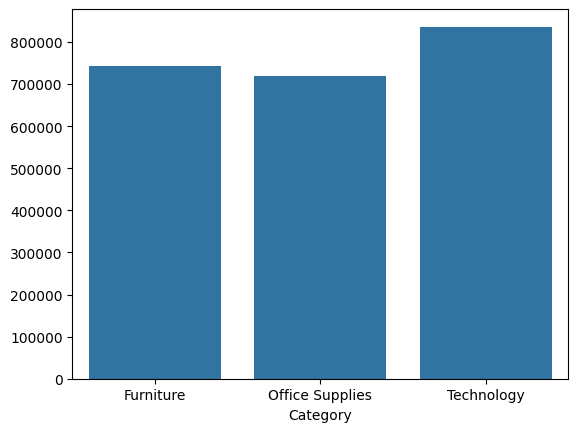

In [ ]:
# Sales By category
sales_category=df.groupby('Category')['Sales'].sum().head()
sns.barplot(x=sales_category.index,y=sales_category.values)

<Axes: xlabel='Product Name'>

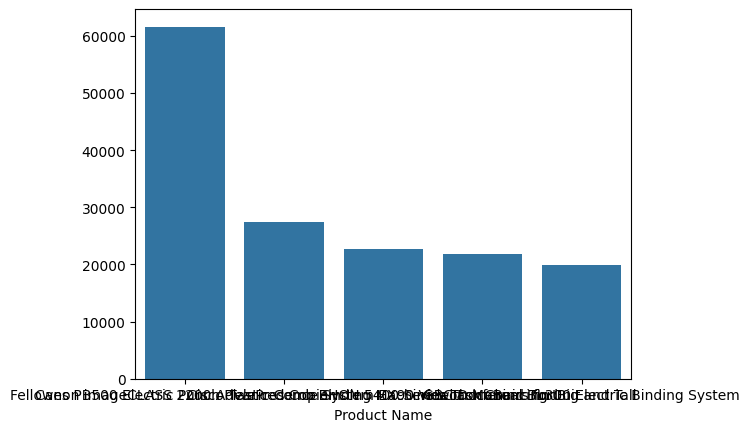

In [ ]:
# Top 5 Products by sales
top_products=df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head()
sns.barplot(x=top_products.index,y=top_products.values)

([<matplotlib.patches.Wedge at 0x7e209a184810>,
 [Text(0.5556672552783689, 0.9493333984493562, 'New York City'),
  Text(-1.0352213307520806, 0.3719096615522263, 'Los Angeles'),
  Text(-0.7219758201604366, -0.8299101849620024, 'Seattle'),
  Text(0.24773201187447985, -1.0717410369546474, 'San Francisco'),
  Text(0.9938094911532916, -0.4715322844659055, 'Philadelphia')],
 [Text(0.3030912301518376, 0.5178182173360124, '33.1%'),
  Text(-0.5646661804102258, 0.20285981539212342, '22.7%'),
  Text(-0.39380499281478354, -0.4526782827065467, '15.5%'),
  Text(0.13512655193153444, -0.5845860201570803, '14.6%'),
  Text(0.5420779042654318, -0.2571994278904939, '14.1%')])

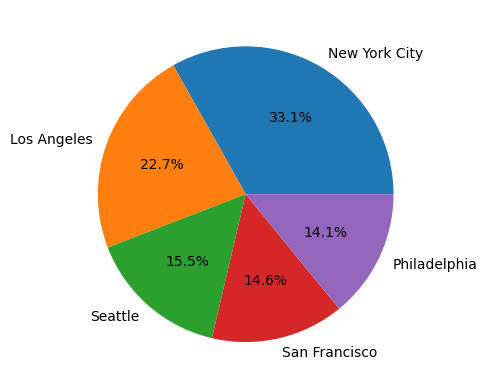

In [ ]:
#sales By reigon (considering top 5)
sales_reigon=df.groupby('City')['Sales'].sum().sort_values(ascending=False).head()
plt.pie(sales_reigon,labels=sales_reigon.index,autopct='%1.1f%%')

<Axes: xlabel='Order Date'>

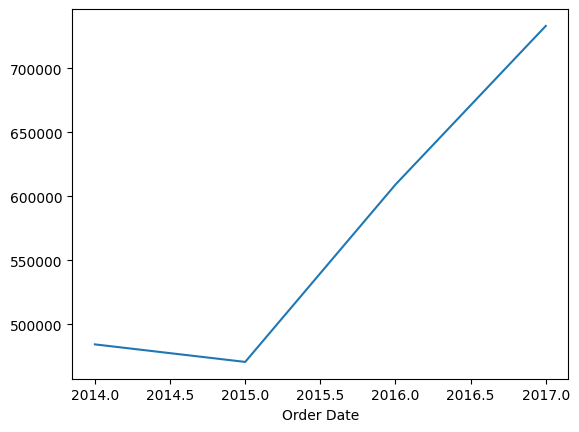

In [ ]:
# sales over time
sales_time=df.groupby(df['Order Date'].dt.year)['Sales'].sum()
sns.lineplot(x=sales_time.index,y=sales_time.values)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [ ]:
df['year']=df['Order Date'].dt.year